## Heart Failure Prediction

**What is Heart Failure?**

Heart Failure is a condition when the heart muscle does not pump blood as well as it should
to meet the body's demands. Blood is the most important fluid that circulates throughout the
body by supplying oxygen to all the parts of the body

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an
estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four
out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths
occur prematurely in people under 70 years of age. Heart failure is a common event caused
by CVDs and this dataset contains 11 features that can be used to predict a possible heart
disease

People with cardiovascular disease or who are at high cardiovascular risk (due to the
presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or
already established disease) need early detection and management wherein a machine
learning model can be of great help

## Aim :
- To classify / predict whether a patient is prone to heart failure depending on multiple attributes.
- It is a binary classification with multiple numerical and categorical features.

### Steps Involded:
- Data Visualization
- Data Scaling
- Statistical Tests for Feature Engineering
- Modeling and visualization of results for algorithms

## Dataset Attributes

1. Age : age [years]
2. anaemia : Decrease of red blood cells or hemoglobin (boolean)
3. creatinine_phosphokinase : Level of the CPK enzyme in the blood (mcg/L)
4. diabetes : If the patient has diabetes (boolean)
5. ejection_fraction : Percentage of blood leaving the heart at each contraction (percentage)
6. high_blood_pressure : If the patient has hypertension (boolean)
7. platelets : Platelets in the blood (kiloplatelets/mL)
8. serum_creatinine : Level of serum creatinine in the blood (mg/dL)
9. serum_sodium : Level of serum sodium in the blood (mEq/L)
10. sex : Woman or man (binary)
11. smoking : If the patient smokes or not (boolean)
12. time : Follow-up period (days)
13. DEATH_EVENT : If the patient deceased during the follow-up period (boolean)

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#97C1A9','#FFFFFF']
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load the dataset
data=pd.read_csv('/home/arnol/Videos/archive/heart_failure_clinical_records_dataset.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.shape

(299, 13)

In [6]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


In [8]:
# % of null values
data.isnull().mean()*100

age                         0.0
anaemia                     0.0
creatinine_phosphokinase    0.0
diabetes                    0.0
ejection_fraction           0.0
high_blood_pressure         0.0
platelets                   0.0
serum_creatinine            0.0
serum_sodium                0.0
sex                         0.0
smoking                     0.0
time                        0.0
DEATH_EVENT                 0.0
dtype: float64

## EDA

In [9]:
data['age'] = data['age'].astype(int)
data['platelets'] = data['platelets'].astype(int)
df = data.copy(deep = True)

In [10]:
df.loc[df['DEATH_EVENT']==0,'Status']='Survived'
df.loc[df['DEATH_EVENT']==1,'Status']='Not Survived'

In [11]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : anaemia diabetes high_blood_pressure sex smoking DEATH_EVENT
Numerical Features : age creatinine_phosphokinase ejection_fraction platelets serum_creatinine serum_sodium time


Text(0.5, 0.98, 'Death Event')

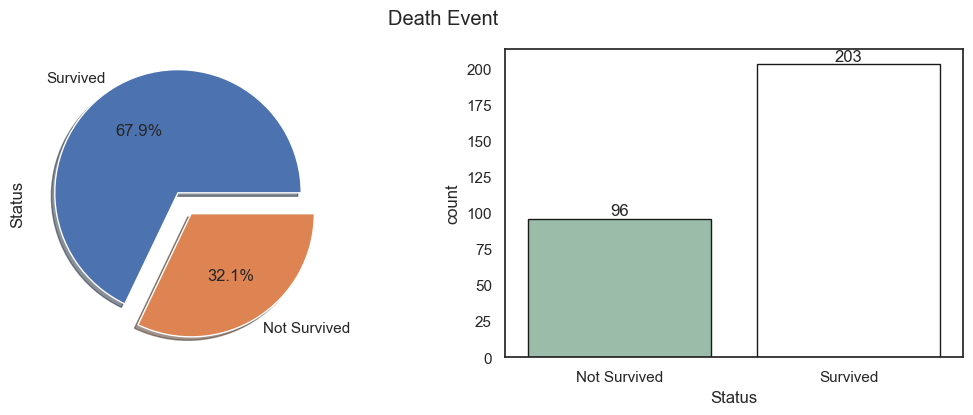

In [12]:
sns.set(style='white')
fig = plt.subplots(1,2,figsize = (13,4))
plt.subplot(1,2,1)
df['Status'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True)
plt.subplot(1,2,2)
ax=sns.countplot(data=df, x='Status',palette = colors,edgecolor = 'k')
ax.bar_label(ax.containers[0])
plt.suptitle('Death Event')

1. The dataset has very low data points (299)
2. The dataset is unbalanced with 2:1 ratio for No Death Event cases : Death Event cases
3. Visualizations and Predictions will be biased towards No Death Event cases.

## Categorical Features

In [13]:
# Categorical Plot
def catplot(df,x):
    sns.set(style='white')
    fig = plt.subplots(1,3,figsize = (15,4))
    plt.subplot(1,3,1)
    df[x].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True)
    plt.subplot(1,3,2)
    ax=sns.histplot(data=df,x=x,kde = True,color=colors[0],edgecolor = 'k')
    ax.bar_label(ax.containers[0])
    # ax.set_xlim(-1,2)
    # ax.set_xticks(range(-1,2))
    plt.subplot(1,3,3)
    ax=sns.countplot(data=df, x=x, hue='Status',palette = colors,edgecolor = 'k')
    for container in ax.containers:
        ax.bar_label(container)
    tit = x + ' vs Death Event'
    plt.suptitle(tit)

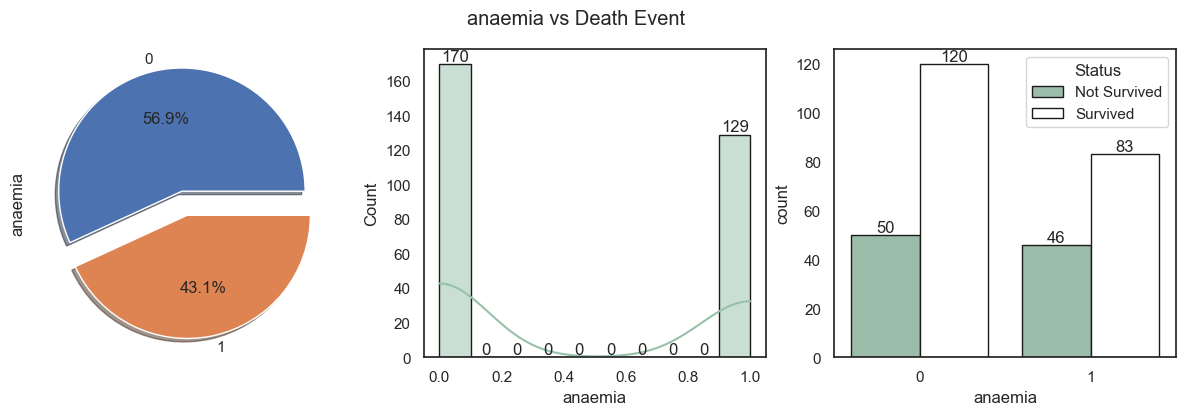

In [14]:
#Categorical plot of anaemia vs Death Event
catplot(df,'anaemia')

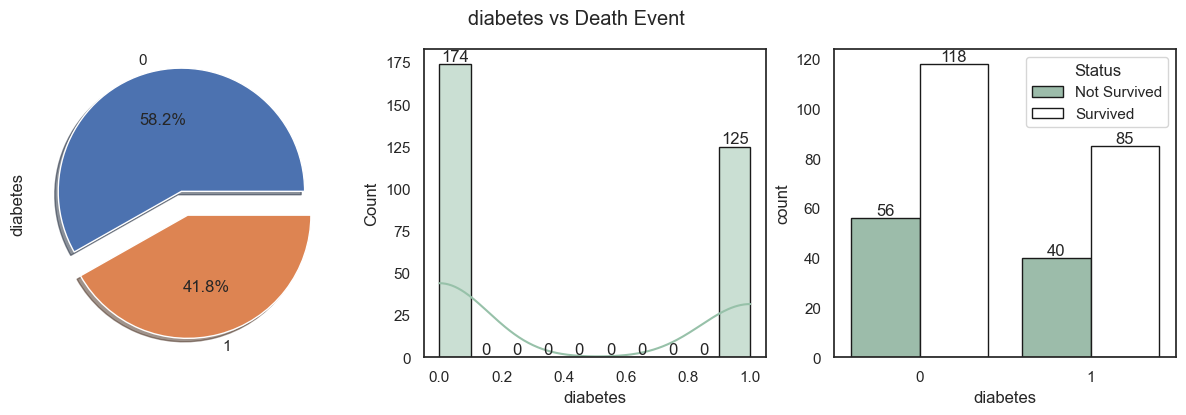

In [15]:
#Categorical plot of diabetes vs Death Event
catplot(df,'diabetes')

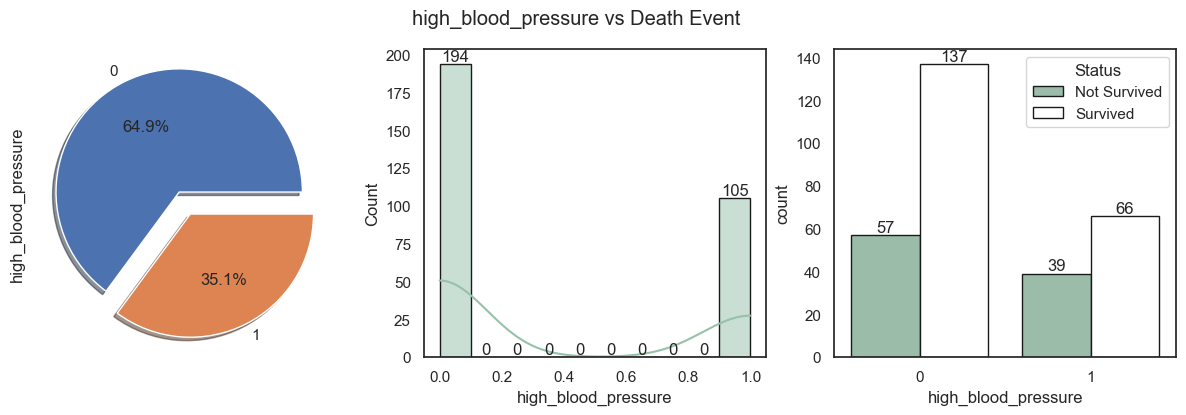

In [16]:
#Categorical plot of high_blood_pressure vs Death Event
catplot(df,'high_blood_pressure')

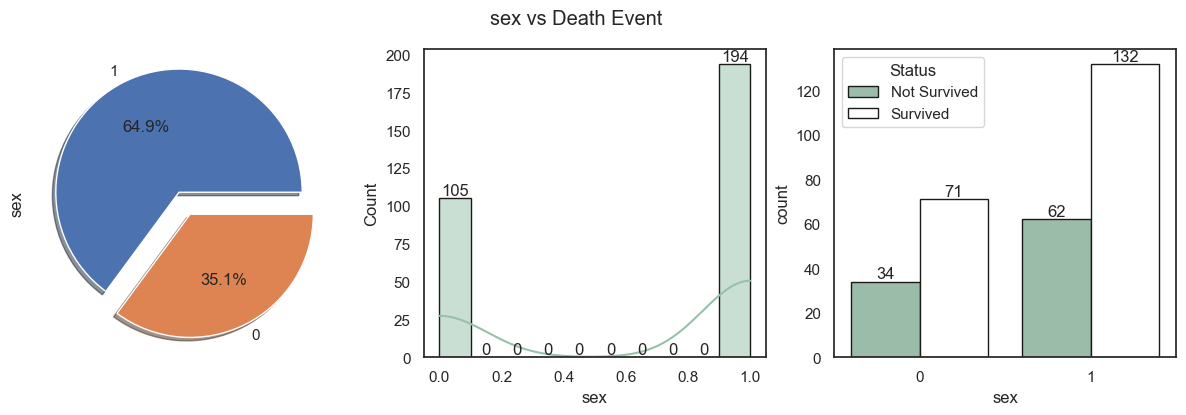

In [17]:
#Categorical plot of gender vs Death Event
catplot(df,'sex')

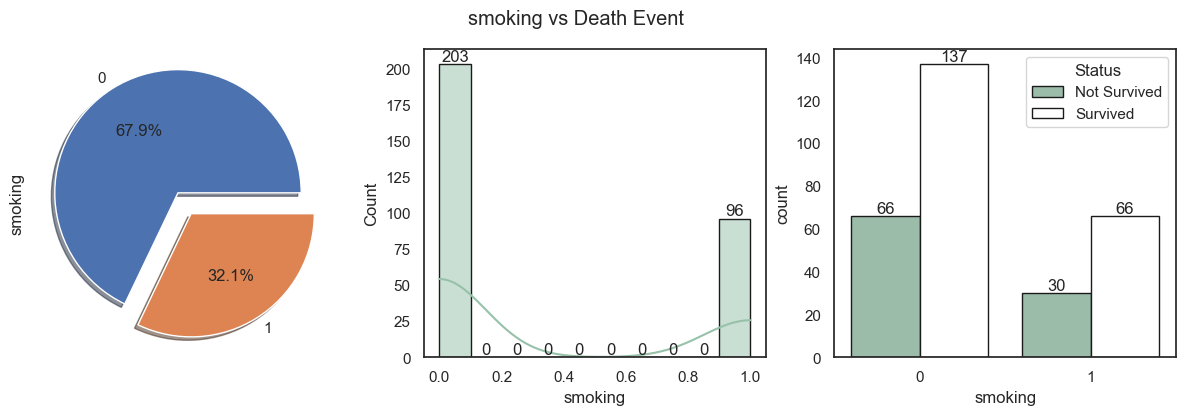

In [18]:
#Categorical plot of smoking vs Death Event
catplot(df,'smoking')

## Summary

1. Categorical Features Insight :

- All the graphs have the same pattern
- There are more cases of male population

2. Categorical Features Sumary :

- anaemia : Anaemia = No Anaemia
- diabetes : Diabetes = No Diabetes
- high_blood_pressure : High Blood Pressure > No High Blood Pressure (Needs more data)
- sex : Male > Female
- smoking : No Smoking > Smoking

3. Genaral Information

- anaemia : High chances of heart failures due to anaemia.
- diabetes : High chances of heart failures due to diabetes.
- high blood pressure : High chances with heart failures due to high blood pressure.
- sex : male > female but by small margin are prone to more heart failures.
- smoking : Smoking increases the chances of suffering from heart failures.

## Numerical Features

In [19]:
# Numerical Plot
def numplot(df,x,scale):
    sns.set(style='whitegrid')
    fig = plt.subplots(2,1,figsize = (15,11))
    plt.subplot(2,1,1)
    ax=sns.histplot(data=df, x=x, kde=True,color=colors[0],edgecolor = 'k')
    ax.bar_label(ax.containers[0])
    tit=x + ' distribution'
    plt.title(tit)
    plt.subplot(2,1,2)
    tar=x + '_group'
    Tstr= str(scale)
    tit2=x + ' vs Death Event ( ' + Tstr + ' : 1 )'
    df[tar] = [ int(i / scale) for i in df[x]]
    ax=sns.countplot(data=df, x=tar, hue='Status',palette = colors,edgecolor = 'k')
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(tit2)

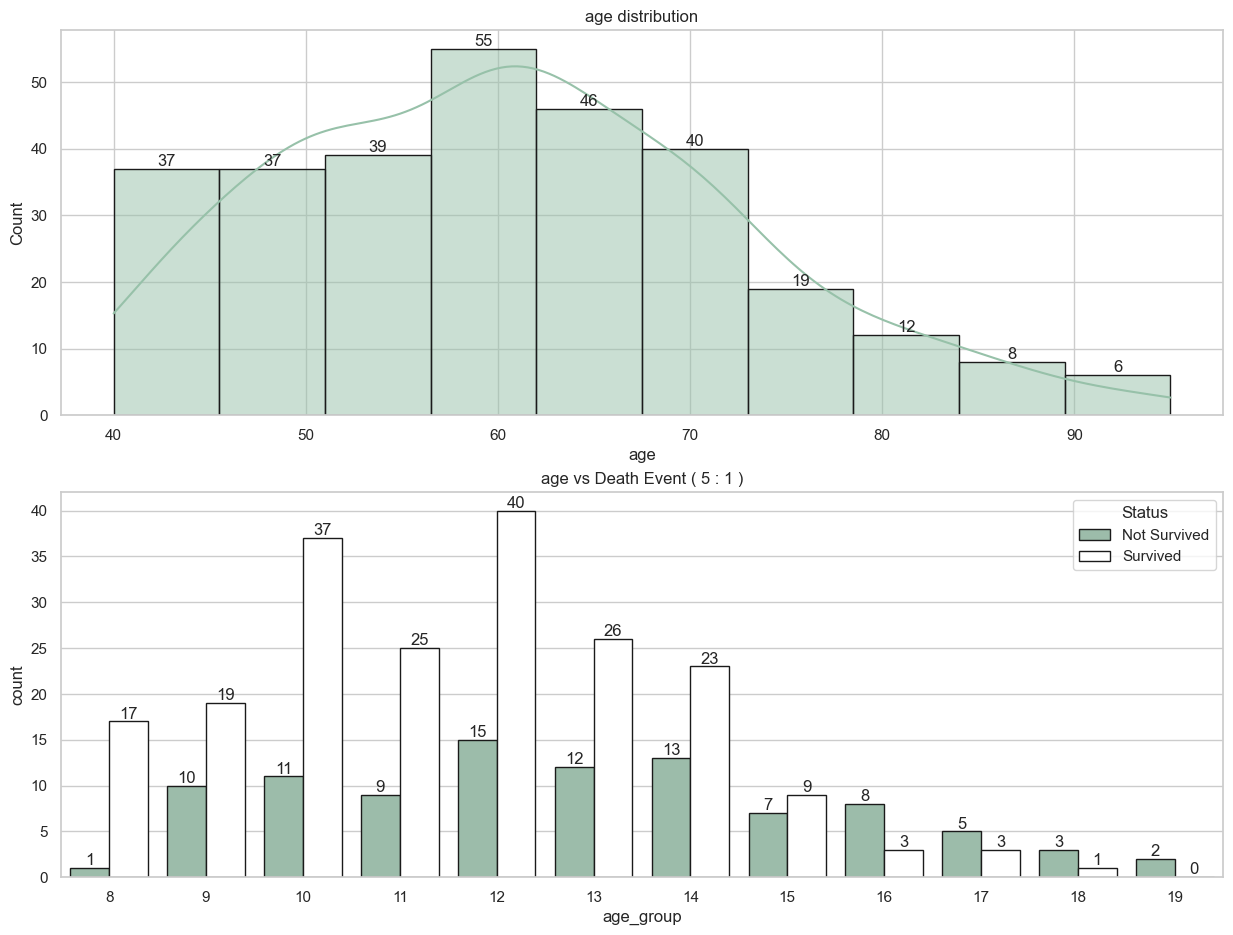

In [20]:
numplot(df,'age',5)

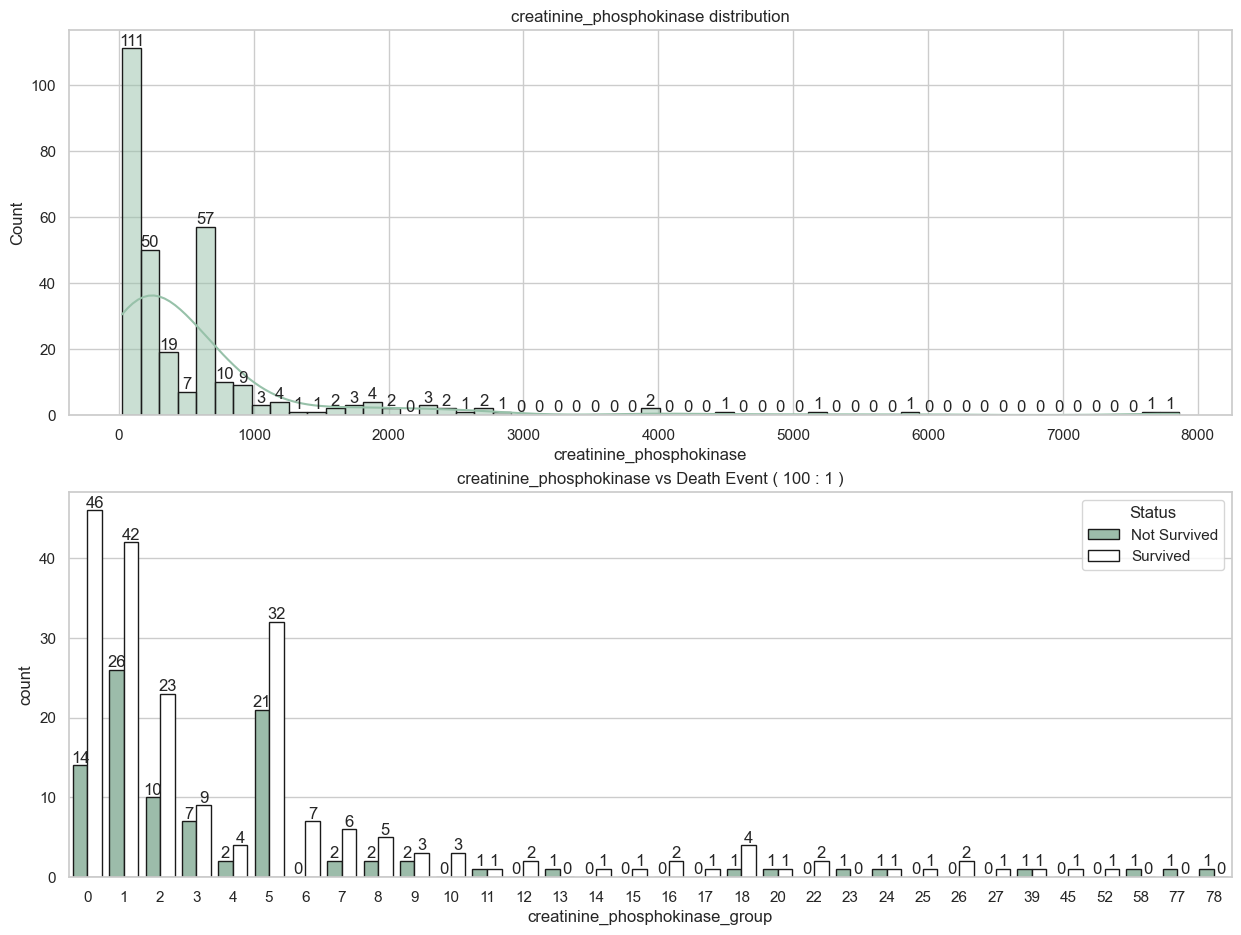

In [21]:
numplot(df,'creatinine_phosphokinase',100)

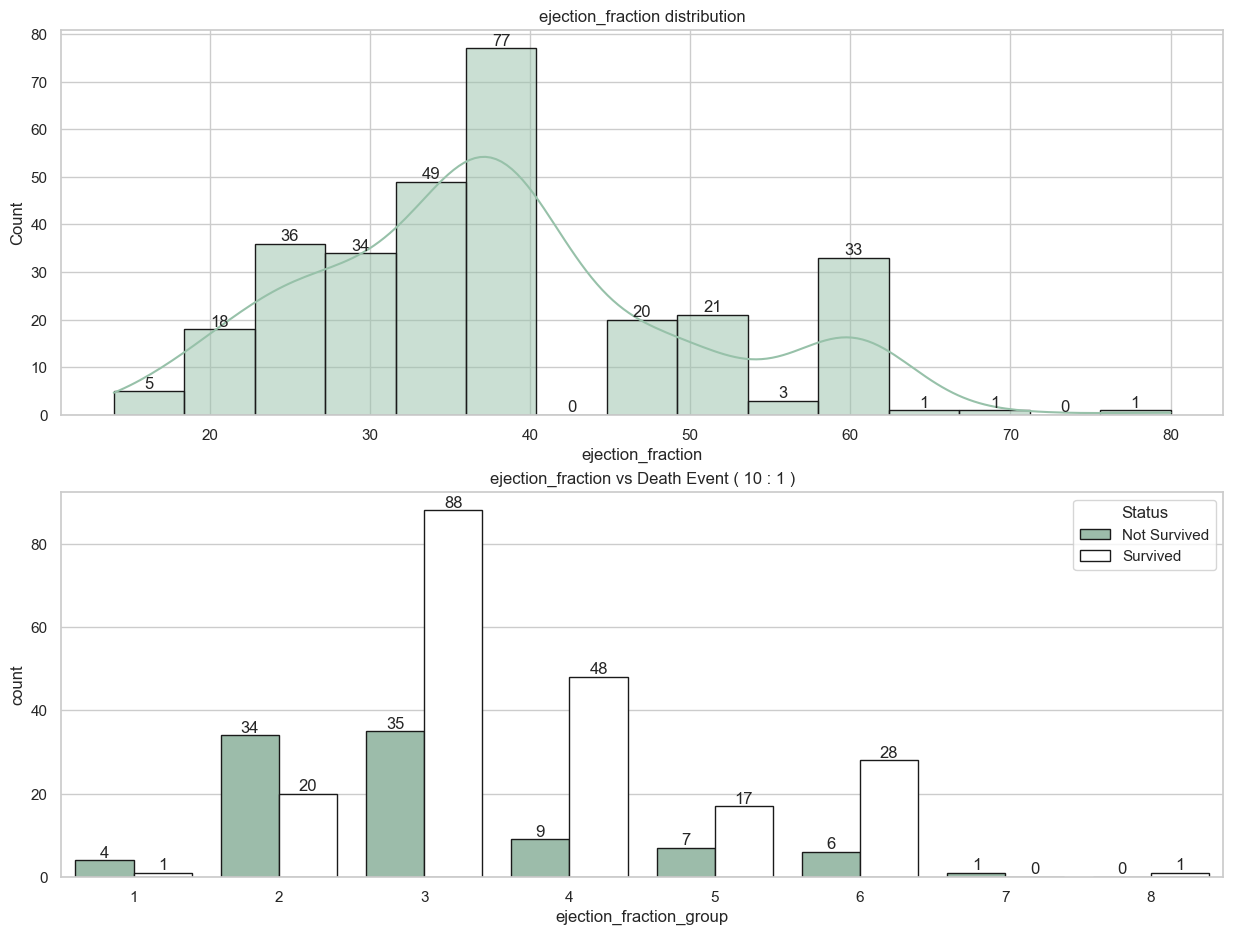

In [22]:
numplot(df,'ejection_fraction',10)

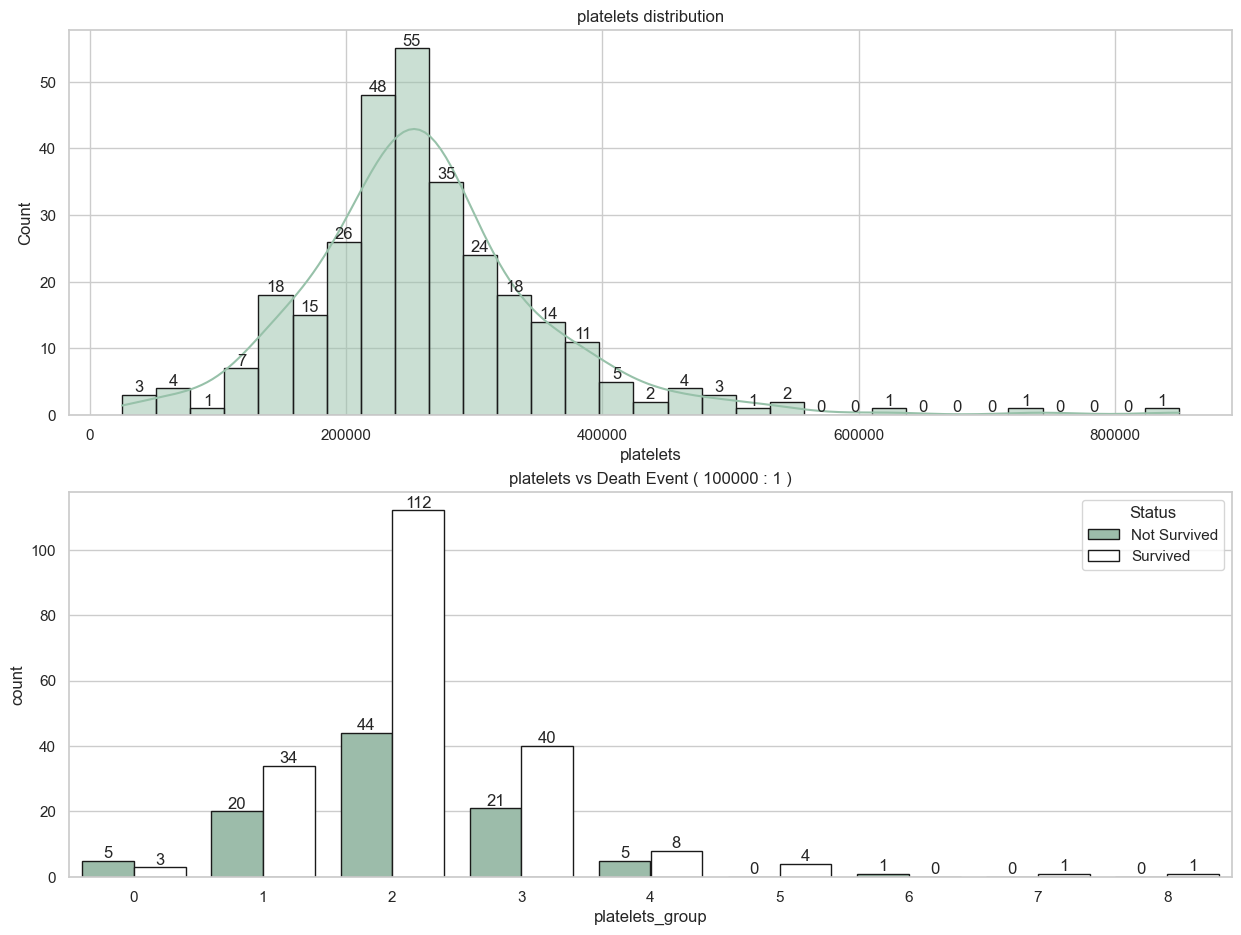

In [23]:
numplot(df,'platelets',10**5)

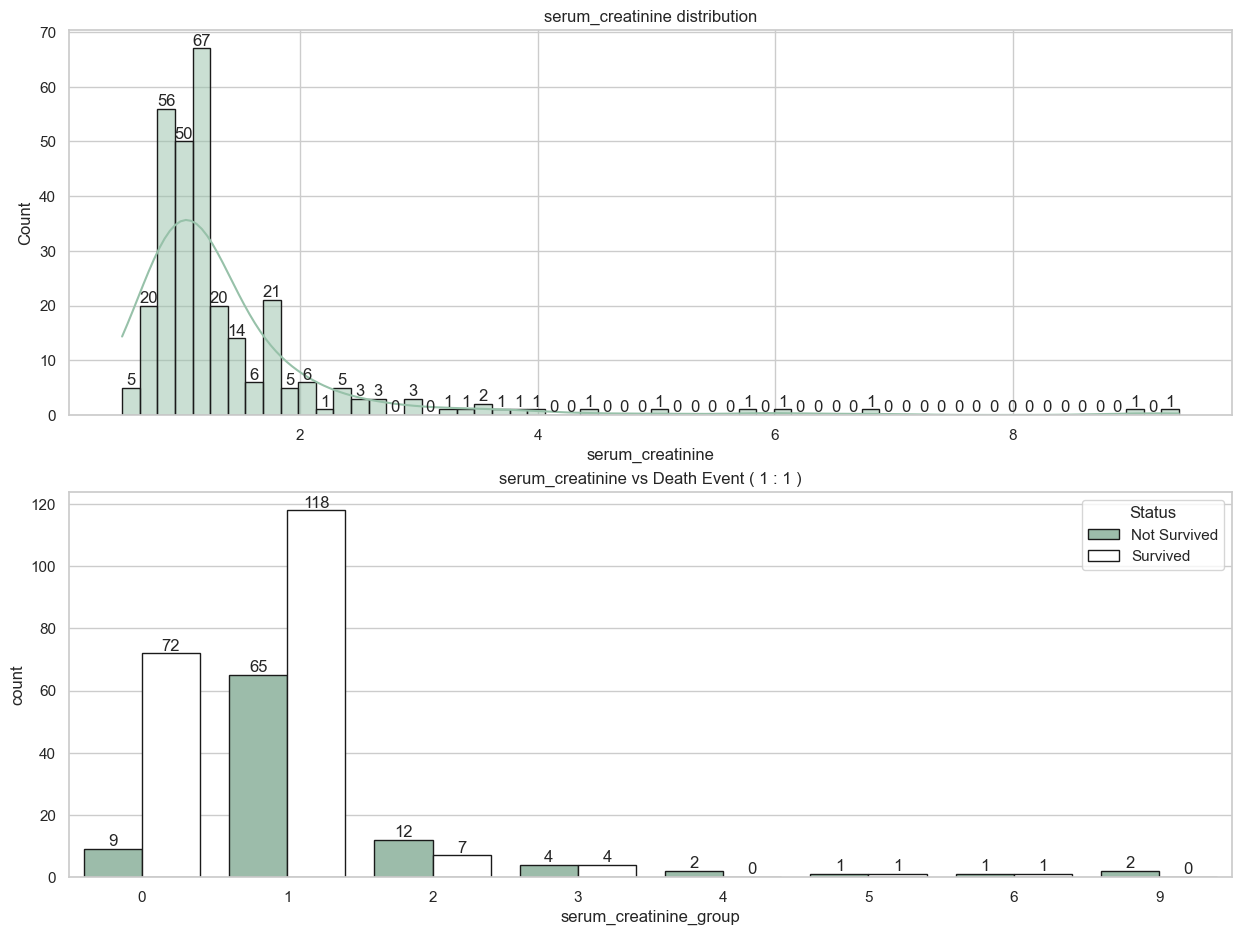

In [24]:
numplot(df,'serum_creatinine',1)

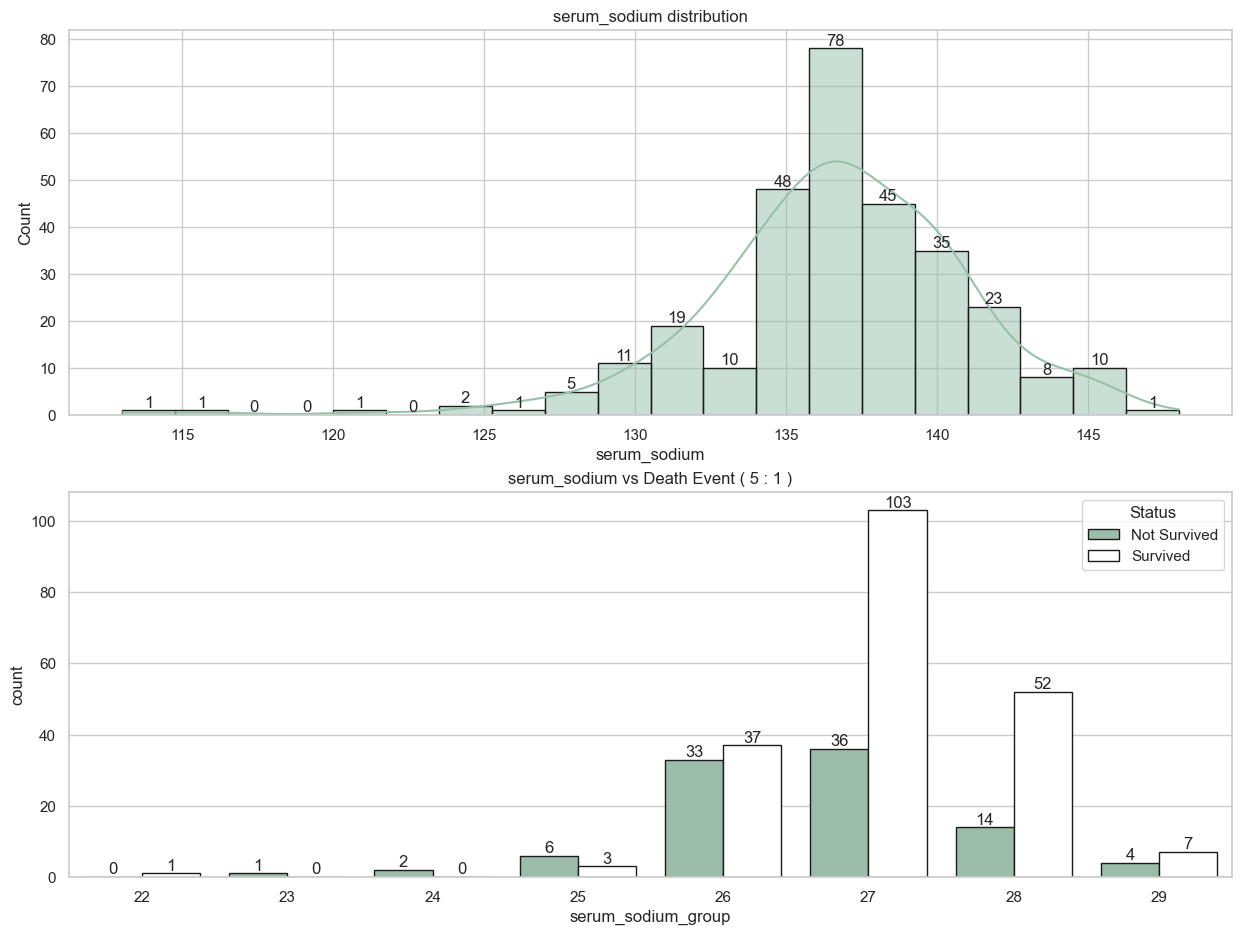

In [25]:
numplot(df,'serum_sodium',5)

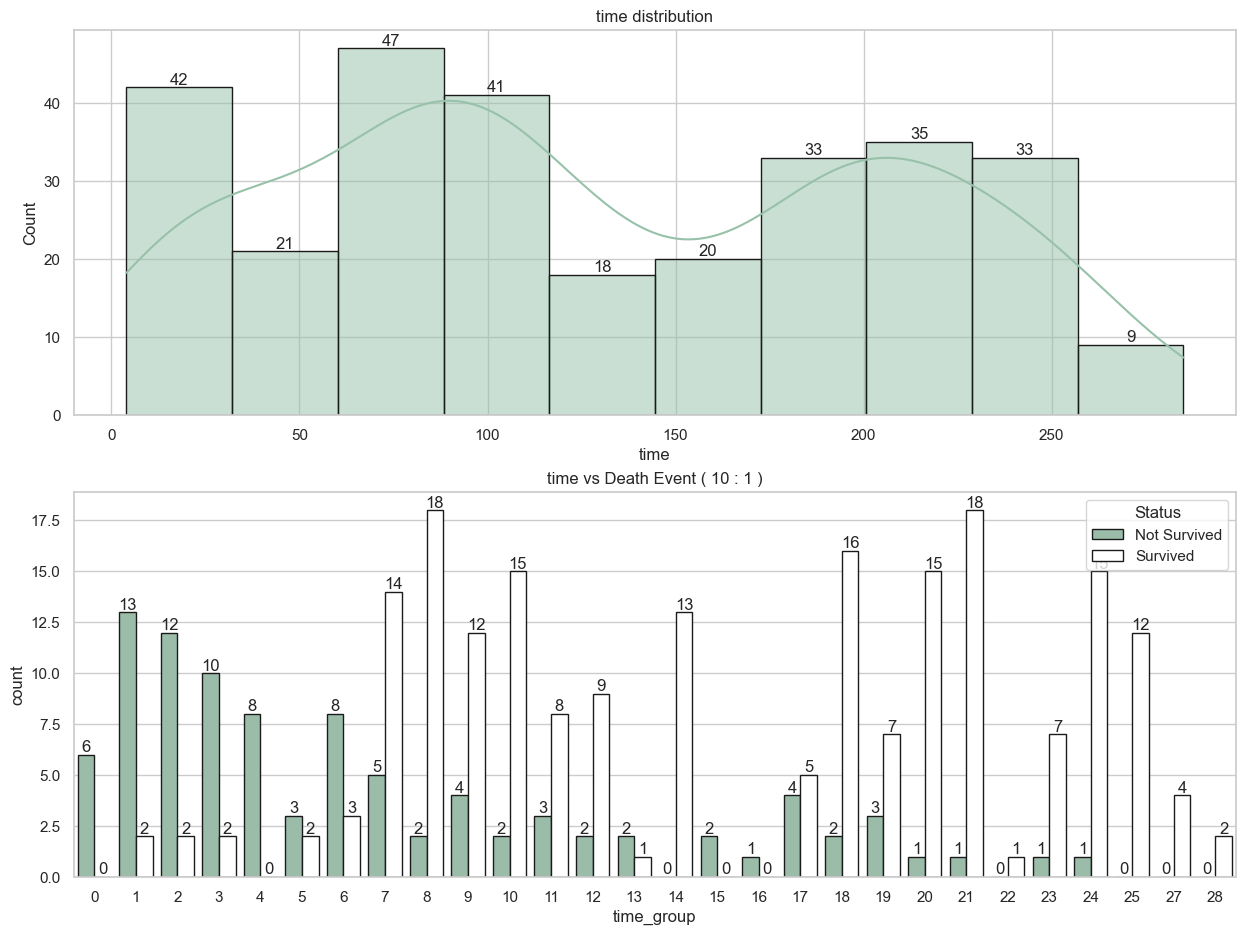

In [26]:
numplot(df,'time',10)

## Summary

1. Numerical Features Insight :
- Cases of DEATH_EVENT initiate from the age of 45. Some specific peaks of high cases of DEATH_EVENT can be observed at 45, 50, 60, 65, and 70
- High cases of DEATH_EVENT can be observed for ejaction_fraction values from 20 - 60.
- serum_creatinine values from 0.6 to 3.0 have higher probability to lead to DEATH_EVENT.
- serum_sodium values 127 - 145 indicate towards a DEATH_EVENT due to heart failure.
- DEATH_EVENT cases are on a high for the values between 0(0x100) - 500(5x100) for creatinine_phosphokinase.
- platelets values between 0(0x10^5) - 400,000(4x10^5) are prone to heart failures leading to DEATH_EVENT.
- For the time feature, values from 0(0x10) - 60(6*10) have higher probability to lead to a DEATH_EVENT.

2. Categorical Features Sumary :
- age : 50 - 70
- creatinine_phosphokinase : 0 - 500
- ejaction_fraction : 20 - 40
- platelets : 200,000 - 300,000
- serum_creatinine : 1 - 2
- serum_sodium : 130 - 140
- time : 0 - 50

3. General Information
- age : General aging leads to heart failures.
- creatinine_phosphokinase : > 120 mcg/L
- ejection_fraction : Normal Range 55% - 70%. Below 55% is prone to heart failures.
- platelets : Low and very high values of platelets led to heart failure.
- serum_creatinine : 0.8 - 1.7 (mg/dL) is the range of values that leads to most heart failures.
- serum_sodium : Above 130 (mEq/L), chances of heart failure increases by alot.
- time : Ideal follow-up period is of 14 days. Anything above 14 days can lead to worse situations.

## Outlier detection and removal

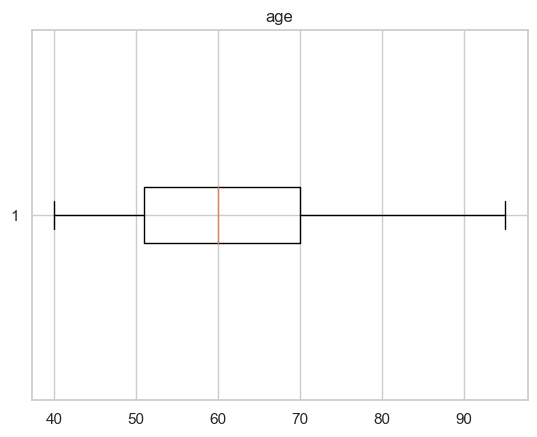

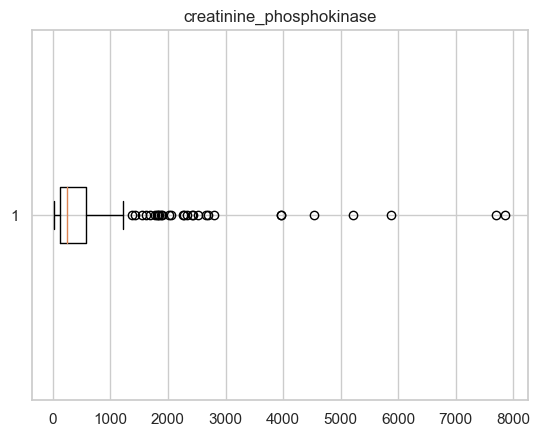

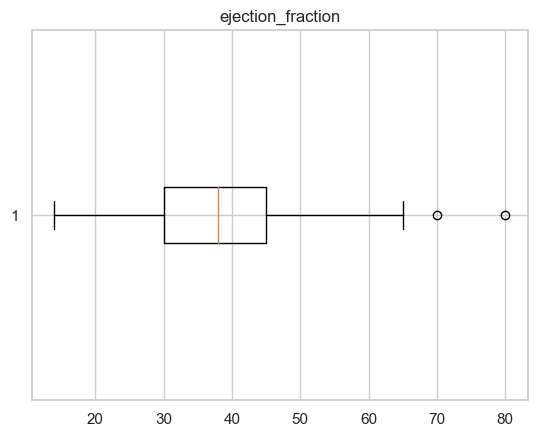

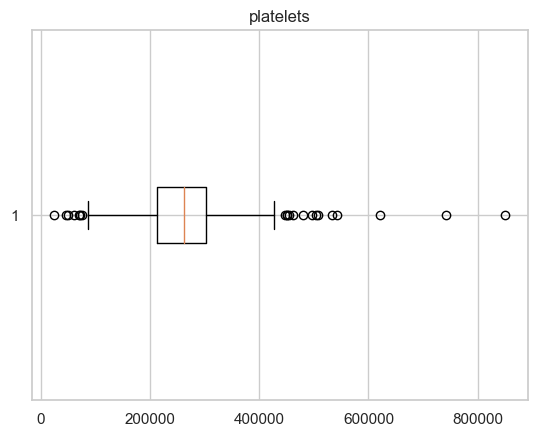

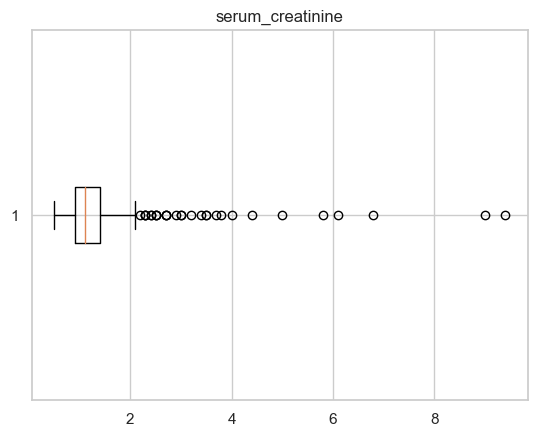

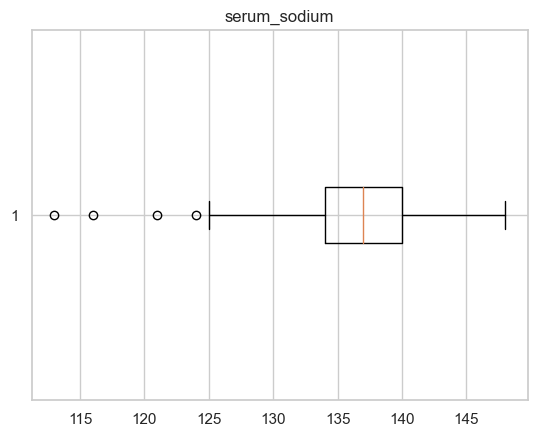

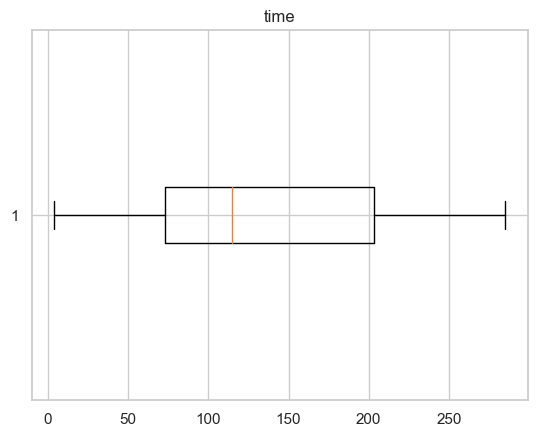

In [27]:
numerical= ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] #numerical_features

#creating boxplot for every numerical feature

for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

In [28]:
def remove_outliers(df):
    for col in numerical:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

df= remove_outliers(df)

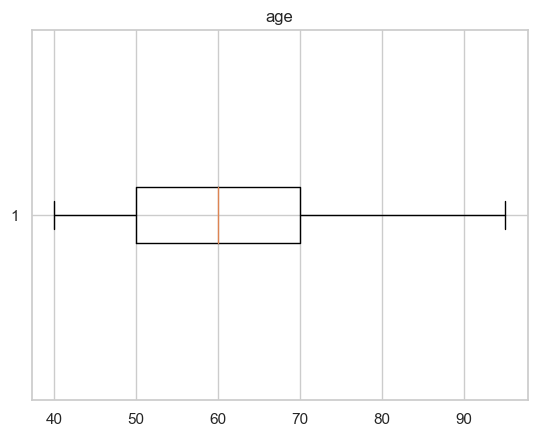

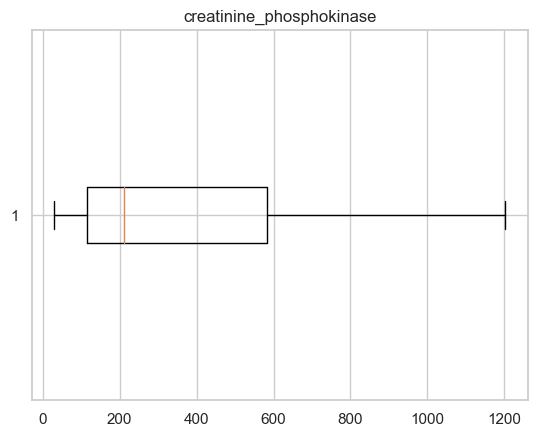

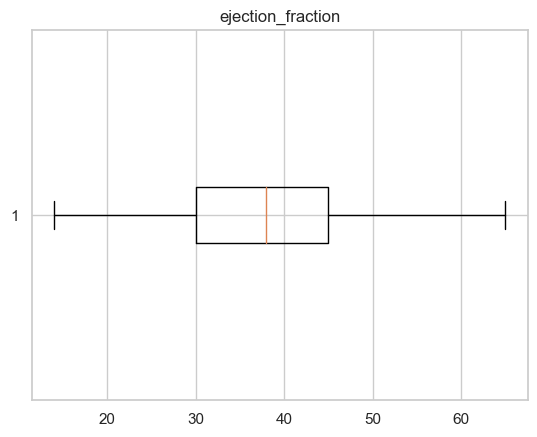

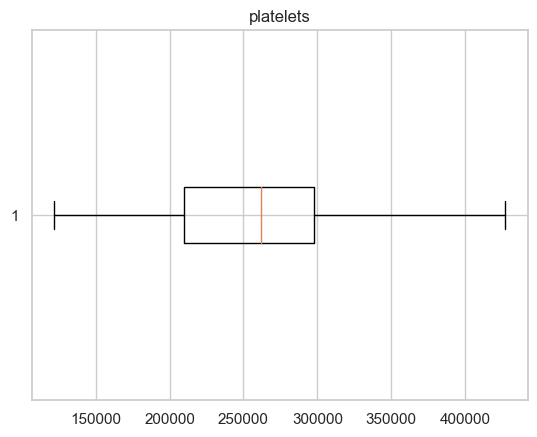

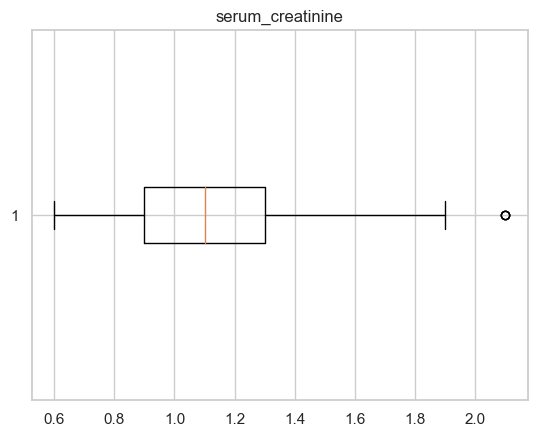

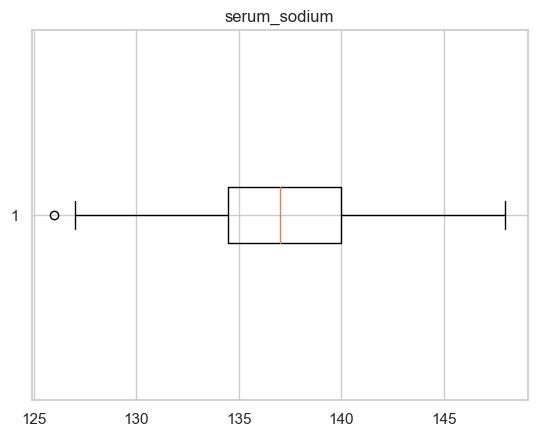

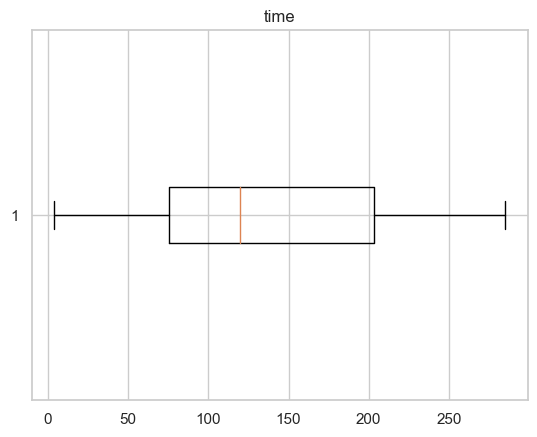

In [29]:
numerical= ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] #numerical_features

#creating boxplot for every numerical feature

for col in df[numerical]:
    plt.boxplot(df[col], vert= False)
    plt.title(col)
    plt.show()

In [30]:
q1 = df['serum_creatinine'].quantile(0.25)
q3 = df['serum_creatinine'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
upper_bound

1.9000000000000001

In [31]:
max(df['serum_creatinine'])

2.1

**Data visualization experts agree that a value should be regarded as an outlier if it’s 1.5 times bigger or smaller than the expected observation.**
- Ultimately, the decision of whether or not to keep the value of 2.1 near to the whiskers is up to you. However, by considering the source and context of the data, you can make an informed decision.
- When identifying outliers, it is important to consider the nature of the data and the purpose of the analysis. In some cases, outliers may be important data points that should be included in the analysis. In other cases, outliers may be noise that should be removed from the analysis.
- Outliers can be caused by a variety of factors, including data entry errors, measurement errors, and natural variation.

## Features Engineering

### Scaling

In [32]:
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
# Normalization
df['age'] = mms.fit_transform(df[['age']])
df['creatinine_phosphokinase'] = mms.fit_transform(df[['creatinine_phosphokinase']])
df['ejection_fraction'] = mms.fit_transform(df[['ejection_fraction']])
df['serum_creatinine'] = mms.fit_transform(df[['serum_creatinine']])
df['time'] = mms.fit_transform(df[['time']])
# Standardization
df['platelets'] = ss.fit_transform(df[['platelets']])
df['serum_sodium'] = ss.fit_transform(df[['serum_sodium']])
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,...,time,DEATH_EVENT,Status,age_group,creatinine_phosphokinase_group,ejection_fraction_group,platelets_group,serum_creatinine_group,serum_sodium_group,time_group
0,0.636364,0,0.470990,0,0.117647,1,0.136644,0.866667,-1.908282,1,...,0.000000,1,Not Survived,15,5,2,2,1,26,0
2,0.454545,0,0.098976,0,0.117647,0,-1.397214,0.466667,-2.177105,1,...,0.010676,1,Not Survived,13,1,2,1,1,25,0
3,0.181818,1,0.069113,0,0.117647,0,-0.682406,0.866667,-0.026521,1,...,0.010676,1,Not Survived,10,1,2,2,1,27,0
5,0.909091,1,0.014505,0,0.509804,1,-0.771757,1.000000,-1.370636,1,...,0.014235,1,Not Survived,18,0,4,2,2,26,0
6,0.636364,1,0.184300,0,0.019608,0,-1.918427,0.400000,-0.026521,1,...,0.021352,1,Not Survived,15,2,1,1,1,27,1


### Correlation

Text(0.5, 1.0, 'DEATH_EVENT Correlation')

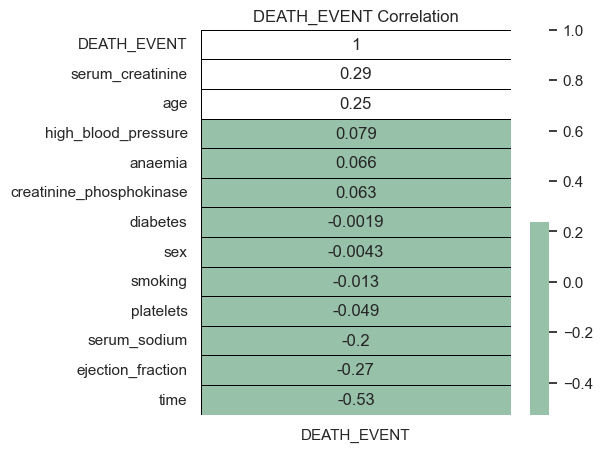

In [33]:
corr = data.corrwith(data['DEATH_EVENT']).sort_values(ascending = False).to_frame()
corr.columns = ['DEATH_EVENT']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black')
plt.title('DEATH_EVENT Correlation')

### Observation
Features like high_blood_pressure, anaemia, creatinine_phosphokinase, diabetes, sex, smoking, and platelets do not display any kind of correlation with DEATH_EVENT.

### We will create models based on :
1. Based on the statistical test, we will drop the following features : high_blood_pressure, anaemia, creatinine_phosphokinase, diabetes, sex, smoking, and platelets
2. Based on the General information., we will drop the following features : sex, platelets.

In [34]:
df1=data.copy()
df2=data.copy()
# Dataset for model based on Statistical Test :
df1 = df1.drop(columns = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking','creatinine_phosphokinase','platelets'])
# Dataset for model based on General Information :
df2 = df2.drop(columns = ['sex','platelets'])

In [68]:
print(df1.columns)
print(df2.columns)

Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time',
       'DEATH_EVENT'],
      dtype='object')
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'serum_creatinine',
       'serum_sodium', 'smoking', 'time', 'DEATH_EVENT'],
      dtype='object')


## Data Balancing

In [35]:
def get_precisions_recalls(actual, preds):
    plt.figure(figsize=(16,4))
    
    plt.subplot(1,2,1)
    precision_0 = np.sum((actual == 0) & (preds == 0)) / np.sum(preds == 0)
    precision_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(preds == 1)
    
    plt.bar([0,1], [precision_0, precision_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('Precision', fontsize=20)
    plt.title(f'Precision Class 0: {round(precision_0,2)}\nPrecision Class 1: {round(precision_1,2)}', fontsize=20)
    
    plt.subplot(1,2,2)
    recall_0 = np.sum((actual == 0) & (preds == 0)) / np.sum(actual == 0)
    recall_1 = np.sum((actual == 1) & (preds == 1)) / np.sum(actual == 1)
    
    plt.bar([0,1], [recall_0, recall_1])
    plt.xticks([0,1], ['Class 0', 'Class 1'], fontsize=20)
    plt.yticks(np.arange(0,1.1,0.1), fontsize=14)
    plt.ylabel('Recall', fontsize=20)
    plt.title(f'Recall Class 0: {round(recall_0,2)}\nRecall Class 1: {round(recall_1,2)}', fontsize=20)
    
    plt.tight_layout()
    plt.show()

## Data Handling for ML

In [36]:
def read_data(data):
    df = data.sample(frac=1).reset_index(drop=True)
    df_train = df.iloc[:len(df)//2]
    df_test = df.iloc[len(df)//2:]
    X_train = df_train[[c for c in df.columns if c != 'DEATH_EVENT']].values
    labels_train = df_train.DEATH_EVENT.values
    X_test = df_test[[c for c in df.columns if c != 'DEATH_EVENT']].values
    labels_test = df_test.DEATH_EVENT.values
    return X_train, labels_train, X_test, labels_test

In [37]:
X_train, labels_train, X_test, labels_test = read_data(data)

In [38]:
print('Fraction of positive labels:', str(round(100*np.mean(labels_train),3)) + '%')

Fraction of positive labels: 32.886%


In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train, labels_train)
preds = clf.predict(X_test)

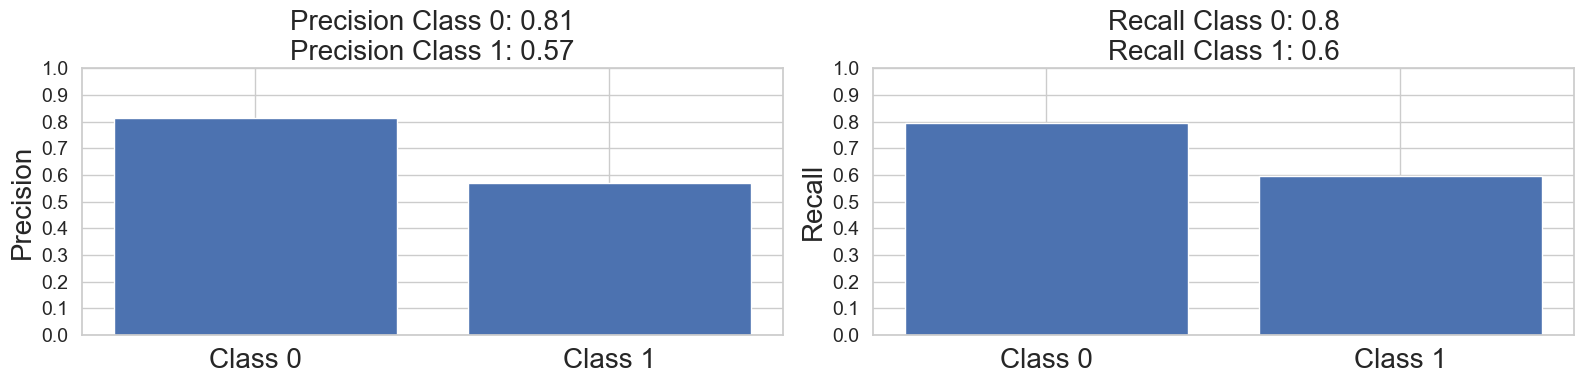

In [40]:
get_precisions_recalls(labels_test, preds)

### Upweight the Minority Class

In [41]:
weight_minority_class = np.sum(labels_train == 0) / np.sum(labels_train == 1)

In [42]:
weight_minority_class

2.0408163265306123

In [43]:
clf = DecisionTreeClassifier(class_weight={0:1, 1:weight_minority_class})
clf.fit(X_train, labels_train)
preds = clf.predict(X_test)

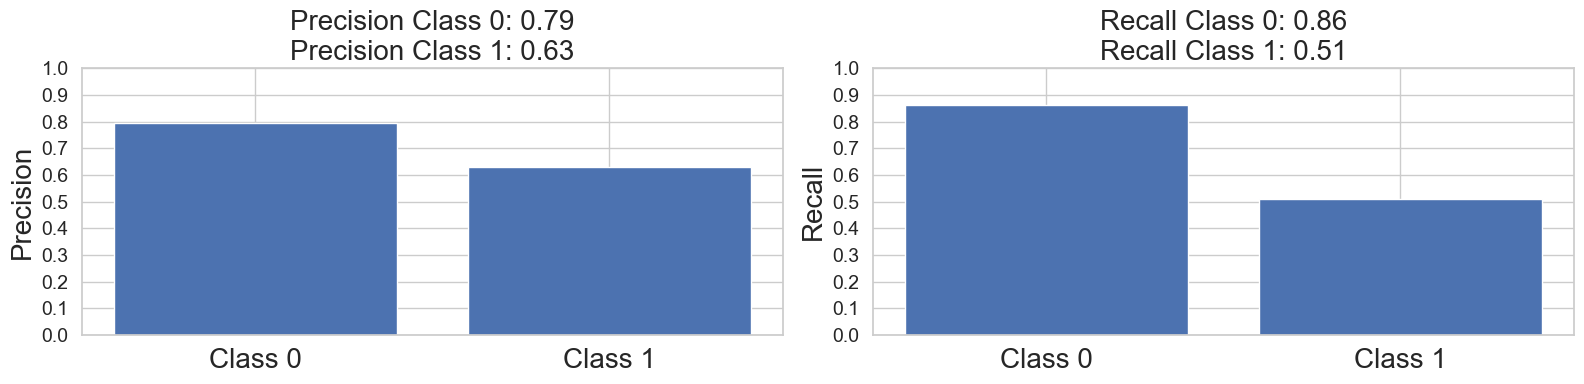

In [44]:
get_precisions_recalls(labels_test, preds)

### Oversample Minority Class

In [45]:
#get indices of each class
indices_0 = np.where(labels_train == 0)[0]
indices_1 = np.where(labels_train == 1)[0]
indices = np.concatenate([indices_0, indices_1])

#get weights for each class
weights = np.empty(indices_0.shape[0] + indices_1.shape[0])
weights[:indices_0.shape[0]] = 1
weights[indices_0.shape[0]:] = weight_minority_class
weights = weights/np.sum(weights)

#sample new indices
sampled_indices = np.random.choice(indices, indices.shape[0], p=weights)

In [46]:
#consruct oversampled datasets
X_train_oversampled = X_train[sampled_indices]
labels_train_oversampled = labels_train[sampled_indices]

In [47]:
print('Fraction of positive labels in oversampled data:', str(round(100*np.mean(labels_train_oversampled),3)) + '%')

Fraction of positive labels in oversampled data: 51.007%


In [48]:
clf = DecisionTreeClassifier()
clf.fit(X_train_oversampled, labels_train_oversampled)
preds = clf.predict(X_test)

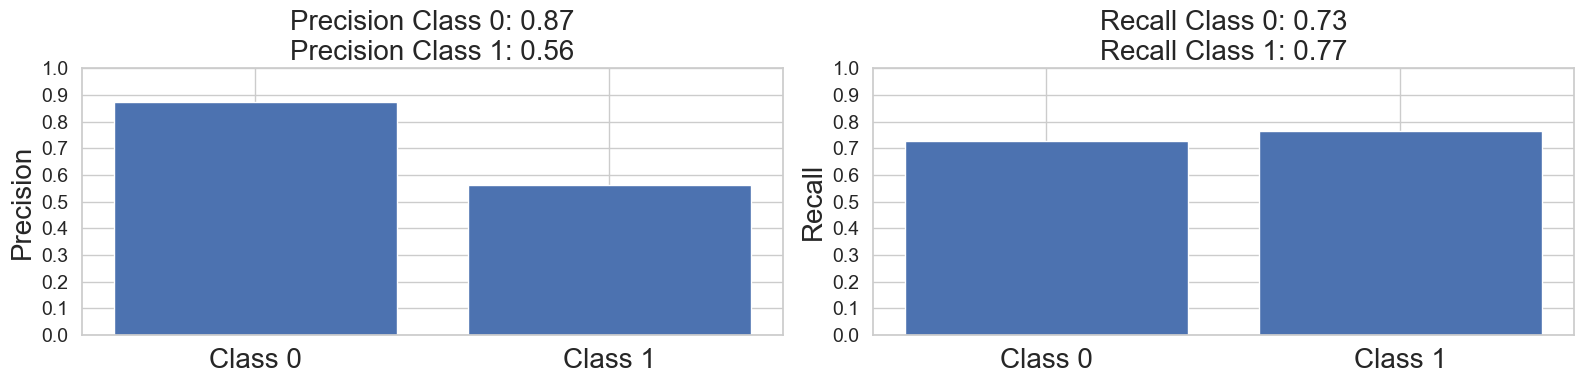

In [49]:
get_precisions_recalls(labels_test, preds)

### SMOTE (Synthetic Minority Oversampling Technique)

In [50]:
#populate entire dataset
X_train_oversampled_smote = []
labels_train_oversampled_smote = []

for _ in range(X_train.shape[0]):
    p = np.random.random()
    #sample from majority class
    if p < 0.5:
        X_train_oversampled_smote.append(X_train[np.random.choice(indices_0)])
        labels_train_oversampled_smote.append(0)
    #sample from minority class
    else:
        #get two random samples from minority class
        minority_samp_1 = X_train[np.random.choice(indices_1)]
        minority_samp_2 = X_train[np.random.choice(indices_1)]
        
        #get random proportion with which to mix them
        prop = np.random.random()
        
        #generate synthetic sample from minority class
        synthetic_minority_samp = prop*minority_samp_1 + (1-prop)*minority_samp_2
        X_train_oversampled_smote.append(synthetic_minority_samp)
        labels_train_oversampled_smote.append(1)
        
X_train_oversampled_smote = np.array(X_train_oversampled_smote)
labels_train_oversampled_smote = np.array(labels_train_oversampled_smote)

In [51]:
print('Fraction of positive labels in SMOTE oversampled data:', str(round(100*np.mean(labels_train_oversampled_smote),3)) + '%')

Fraction of positive labels in SMOTE oversampled data: 50.336%


In [52]:
unique_naive_oversample = np.unique(X_train_oversampled[labels_train_oversampled == 1], axis=0).shape[0]
unique_smote_oversample = np.unique(X_train_oversampled_smote[labels_train_oversampled_smote == 1], axis=0).shape[0]

print('Num Unique Class=1 Feature Vectors with Naive Oversample:', unique_naive_oversample)
print('Num Unique Class=1 Feature Vectors with SMOTE Oversample:', unique_smote_oversample)

Num Unique Class=1 Feature Vectors with Naive Oversample: 40
Num Unique Class=1 Feature Vectors with SMOTE Oversample: 75


In [53]:
clf = DecisionTreeClassifier()
clf.fit(X_train_oversampled_smote, labels_train_oversampled_smote)
preds = clf.predict(X_test)

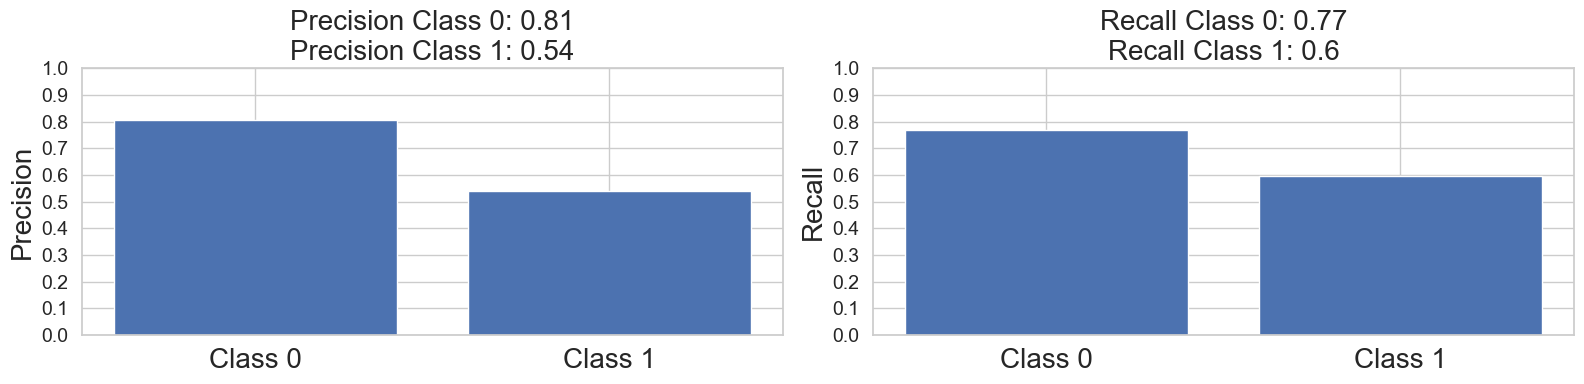

In [54]:
get_precisions_recalls(labels_test, preds)

In [55]:
over = SMOTE()
f1 = df1.iloc[:,:5].values
t1 = df1.iloc[:,5].values
f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({1: 203, 0: 203})

In [56]:
over = SMOTE()
f2 = df2.iloc[:,:10].values
t2 = df2.iloc[:,10].values
f2, t2 = over.fit_resample(f2, t2)
Counter(t2)

Counter({1: 203, 0: 203})

## Model

In [57]:
#Based on the statistical test
x_train1, x_test1, y_train1, y_test1 = train_test_split(f1, t1, test_size = 0.15, random_state=7)

#Based on the General information
x_train2, x_test2, y_train2, y_test2 = train_test_split(f2, t2, test_size = 0.15, random_state=7)

In [58]:
def model(classifier, x_train, y_train, x_test, y_test):
    sns.set(rc={'figure.figsize': (5, 3)})
    sns.set(style='whitegrid')
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Cross Validation Score: {:.2%}".format(np.mean(cross_val_score(classifier, x_train, y_train, cv=7))))
    print("ROC_AUC Score: {:.2%}".format(roc_auc_score(y_test, prediction)))
    RocCurveDisplay.from_estimator(classifier, x_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

In [59]:
def model_evaluation(classifier,x_test,y_test):
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

## XGB Classifier

![](https://d1rwhvwstyk9gu.cloudfront.net/2020/02/XG-Boost-FINAL-01.png)
**XGBoost is a machine learning algorithm that can be used to classify data. It works by building a model that predicts the probability of a data point belonging to a particular class. The model is built by combining multiple decision trees. Each decision tree makes a prediction about the class of a data point. The predictions from the decision trees are then combined to make a final prediction.**

**XGBoost is a powerful algorithm that can be used to solve a variety of classification problems. It is known for its speed, accuracy, and flexibility. However, it is a complex algorithm and can be difficult to understand and use.**

- **Decision trees:** A decision tree is a simple machine learning algorithm that can be used to classify data. A decision tree is made up of a series of nodes. Each node represents a decision that can be made about a data point. The leaves of the tree represent the different classes that a data point can belong to.
- **Ensemble learning:** Ensemble learning is a technique that combines multiple machine learning models to make a better prediction. XGBoost is an ensemble learning algorithm that combines multiple decision trees to make a classification prediction.
- **Gradient boosting:** Gradient boosting is a technique that is used to train ensemble learning models. Gradient boosting works by iteratively adding new models to the ensemble. Each new model is trained to correct the errors of the previous models.

#### Based on the statistical test

Cross Validation Score: 88.43%
ROC_AUC Score: 83.44%


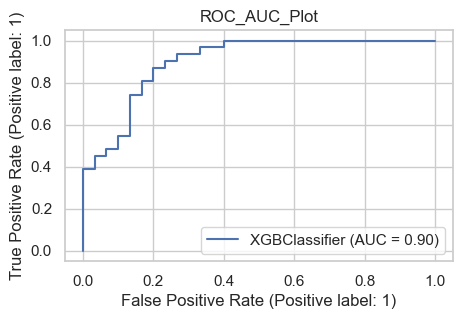

              precision    recall  f1-score   support

           0       0.92      0.73      0.81        30
           1       0.78      0.94      0.85        31

    accuracy                           0.84        61
   macro avg       0.85      0.83      0.83        61
weighted avg       0.85      0.84      0.83        61



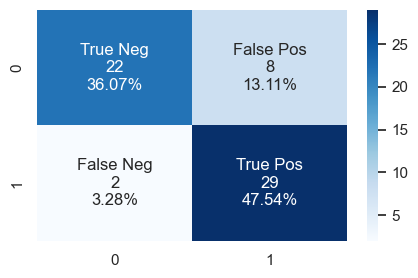

In [60]:
classifier_xgb = XGBClassifier(random_state=1)
model(classifier_xgb,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_xgb,x_test1,y_test1)

#### Based on the General information

Cross Validation Score: 87.27%
ROC_AUC Score: 86.77%


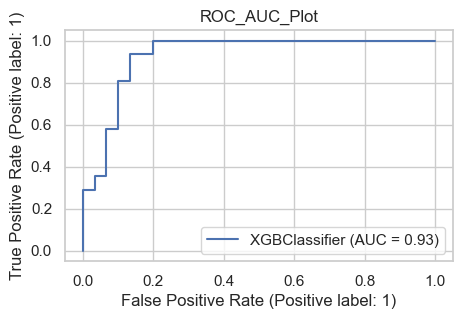

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        30
           1       0.83      0.94      0.88        31

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



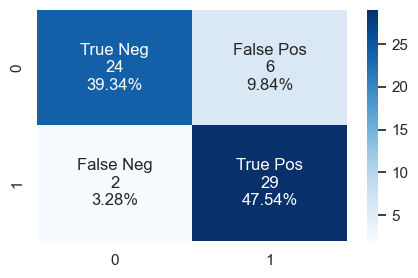

In [61]:
model(classifier_xgb,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_xgb,x_test2,y_test2)

### Logistic Regression
![](https://miro.medium.com/v2/resize:fit:681/1*3FgpptTWzpd2RLgKbV-HvA.jpeg)
- Logistic Regression is a classification algorithm for binary outcomes using input features.
- It finds a line or curve that separates classes by maximizing the probability of correct classification.
- It uses the sigmoid function to map features to probabilities between 0 and 1.
- Training adjusts model parameters by minimizing a cost function with gradient descent.
- Predictions are made by calculating probabilities and applying a threshold.
- Logistic Regression assumes a linear relationship between features and class probabilities.
- It can capture complexity with feature engineering.

#### Based on the statistical test

Cross Validation Score: 80.31%
ROC_AUC Score: 73.66%


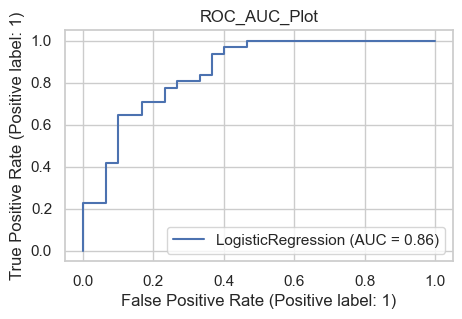

              precision    recall  f1-score   support

           0       0.77      0.67      0.71        30
           1       0.71      0.81      0.76        31

    accuracy                           0.74        61
   macro avg       0.74      0.74      0.74        61
weighted avg       0.74      0.74      0.74        61



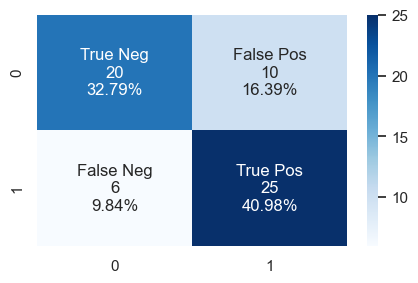

In [62]:
classifier_lr = LogisticRegression(random_state = 1)
model(classifier_lr,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_lr,x_test1,y_test1)

#### Based on the General information

Cross Validation Score: 82.62%
ROC_AUC Score: 80.16%


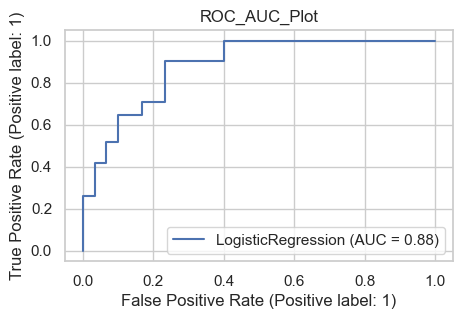

              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



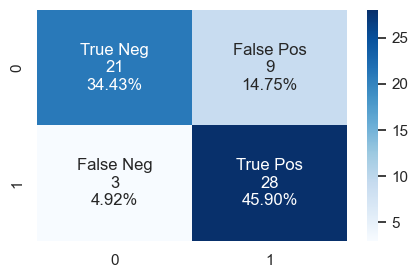

In [63]:
model(classifier_lr,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_lr,x_test2,y_test2)

### Support Vector Classifier
![](https://www.researchgate.net/publication/273308478/figure/fig10/AS:272660772945926@1442018802192/Support-vector-classification-SVC-Illustration-of-an-SVC-classification-function.png)
- Support Vector Classifier (SVC) is a machine learning algorithm for classification tasks.
- It finds the best decision boundary that separates different classes of data points.
- SVC aims to maximize the margin, the distance between the decision boundary and the closest data points from each class.
- It can handle complex datasets that are not linearly separable using a technique called the kernel trick.
- SVC identifies support vectors, which are crucial data points that lie closest to the decision boundary.
- It constructs the decision boundary by minimizing misclassification errors and maximizing the margin.
- When new data points need to be classified, SVC assigns them to a particular class based on which side of the decision boundary they fall on.

#### Based on the statistical test

Cross Validation Score: 81.19%
ROC_AUC Score: 73.92%


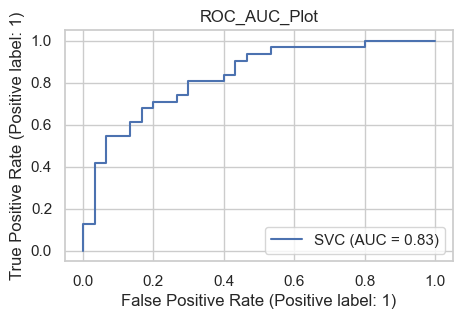

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        30
           1       0.80      0.65      0.71        31

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61



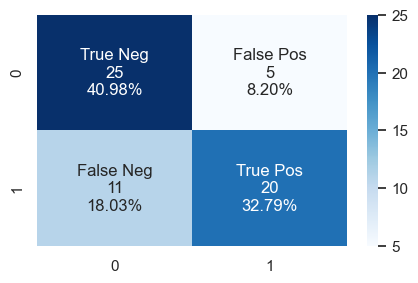

In [64]:
classifier_svc = SVC()
model(classifier_svc,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_svc,x_test1,y_test1)

#### Based on the General information

Cross Validation Score: 71.08%
ROC_AUC Score: 70.32%


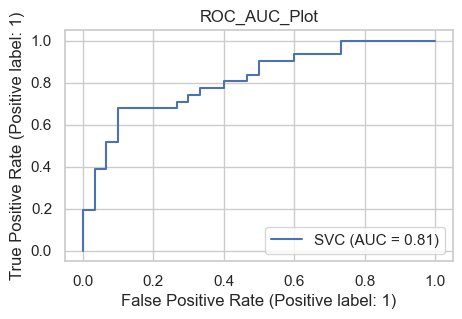

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        30
           1       0.68      0.81      0.74        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



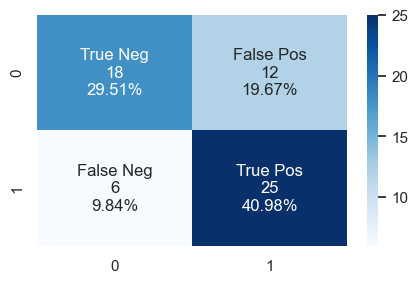

In [65]:
model(classifier_svc,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)

### Gradient Booster Classifier
![](https://miro.medium.com/v2/resize:fit:788/1*pEu2LNmxf9ttXHIALPcEBw.png)

- Gradient Booster Classifier is an algorithm for classification tasks.
- It combines weak models to create a strong predictive model.
- It corrects mistakes made by previous models through iterative training.
- It focuses on misclassified instances to improve accuracy.
- It uses gradient descent optimization for model updates.

#### Based on the statistical test

Cross Validation Score: 87.85%
ROC_AUC Score: 83.49%


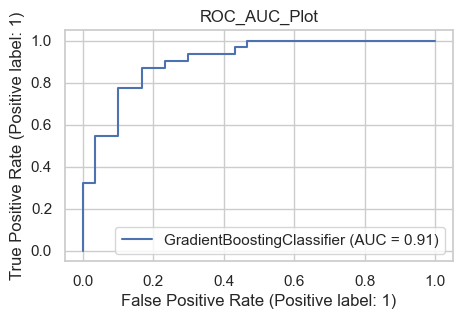

              precision    recall  f1-score   support

           0       0.88      0.77      0.82        30
           1       0.80      0.90      0.85        31

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



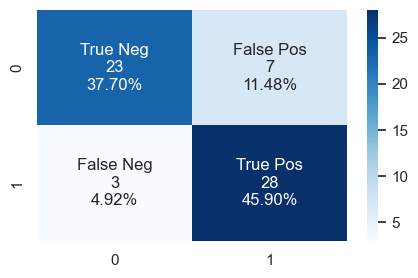

In [66]:
classifier_grad = GradientBoostingClassifier(random_state=1)
model(classifier_grad,x_train1,y_train1,x_test1,y_test1)
model_evaluation(classifier_grad,x_test1,y_test1)

#### Based on the General information

Cross Validation Score: 88.12%
ROC_AUC Score: 80.27%


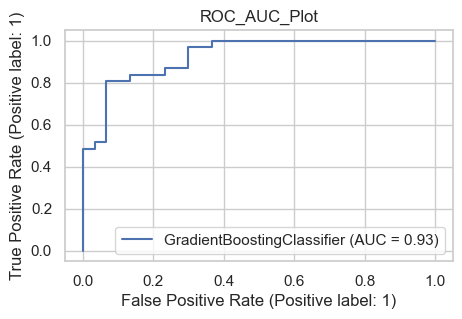

              precision    recall  f1-score   support

           0       0.75      0.60      0.67        30
           1       0.68      0.81      0.74        31

    accuracy                           0.70        61
   macro avg       0.71      0.70      0.70        61
weighted avg       0.71      0.70      0.70        61



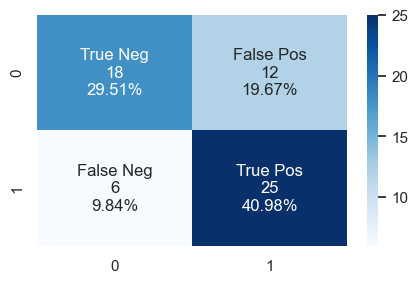

In [67]:
model(classifier_grad,x_train2,y_train2,x_test2,y_test2)
model_evaluation(classifier_svc,x_test2,y_test2)